In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/merged_ers_usgs.csv")
df.head()

,year,state,crop,trait,adoption_percent,pesticide_total
0,2000,IL,corn,Insect-resistant,13,17631659.5
1,2001,IL,corn,Insect-resistant,12,16842578.6
2,2002,IL,corn,Insect-resistant,18,16969552.5
3,2003,IL,corn,Insect-resistant,23,17346230.3
4,2004,IL,corn,Insect-resistant,26,16465656.8


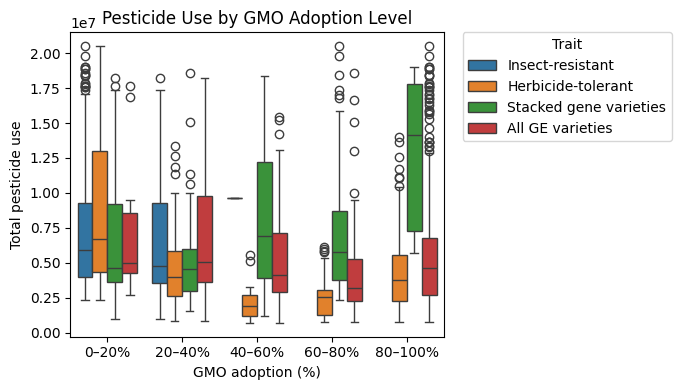

In [6]:
# Ensure adoption is numeric
df["adoption_percent"] = pd.to_numeric(df["adoption_percent"], errors="coerce")

# Drop rows where conversion failed (optional but clean)
df = df.dropna(subset=["adoption_percent"])

# Create bins
bins = [0, 20, 40, 60, 80, 100]
labels = ["0–20%", "20–40%", "40–60%", "60–80%", "80–100%"]

df["adoption_bin"] = pd.cut(
    df["adoption_percent"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Plot
plt.figure(figsize=(7, 4))
ax = sns.boxplot(
    data=df,
    x="adoption_bin",
    y="pesticide_total",
    hue="trait"
)

ax.set_title("Pesticide Use by GMO Adoption Level")
ax.set_xlabel("GMO adoption (%)")
ax.set_ylabel("Total pesticide use")

# Move legend outside
ax.legend(
    title="Trait",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()
plt.show()
